* Source for data Set:-https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Predicting the default of credit card to clients 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA 

* Load the dataset

In [2]:
df=pd.read_excel("default of credit card clients.xls",header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
#see the data description for each column specifications
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
#Chaning name of the label/Target column
df.rename({"default payment next month":"Default"},axis=1,inplace=True)
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
df.drop("ID",axis=1,inplace=True)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


* Identifying and dealing with missing/null data

In [6]:
# Check the data type for each column
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

#### Checking unique values in each column

In [7]:
for column in df.columns:
    print("*"*30 ,column,"*"*30)
    print(f"UNIQUE VALUES :-")
    print(df[column].unique())

****************************** LIMIT_BAL ******************************
UNIQUE VALUES :-
[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
****************************** SEX ******************************
UNIQUE VALUES :-
[2 1]
****************************** EDUCATION ******************************
UNIQUE VALUES :-
[2 1 3 5 4 6 0]
****************************** MARRIAGE *******************

* default payment :- (Yes = 1, No = 0)
* LIMIT_BAL: Amount of the given credit (NT dollar): 
* SEX: Gender (1 = male; 2 = female).
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
* AGE: Age (year).
* PAY_0- PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
* PAY_0 = the repayment status in September, 2005; PAY_1 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. 
* The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.
* PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

## Missing data in columns

#### NOTE :-
* 1.In Education column extra parameter are given {0,5,6} but in original education attributes only have {1,2,3,4} Possible that 0 represents missing data and 5 & 6 are other categories but not mensioned
* 2.In Marriage columns have only {1,2,3} but possible 0 represents missing data

In [8]:

len(df.loc[(df["EDUCATION"] == 0) | (df["MARRIAGE"] == 0)])

68

In [9]:
len(df)

30000

In [10]:
df_no_missing = df.loc[(df["EDUCATION"] != 0) & (df["MARRIAGE"] != 0)]
len(df_no_missing)

29932

* since 68 are missing values in education and marriage column it will less that 1 % data so that we will remove missing datas 

* Lets check these columns

In [11]:
for column in df_no_missing.columns:
    if column == "EDUCATION" or column =="MARRIAGE":
        print("*"*30 ,column,"*"*30)
        print(f"UNIQUE VALUES :-")
        print(df_no_missing[column].unique())
        print("Here is no missing values (0)")

****************************** EDUCATION ******************************
UNIQUE VALUES :-
[2 1 3 5 4 6]
Here is no missing values (0)
****************************** MARRIAGE ******************************
UNIQUE VALUES :-
[1 2 3]
Here is no missing values (0)


* checkig the data is balanced or not,if the data is imbalanced we perform downsampling 

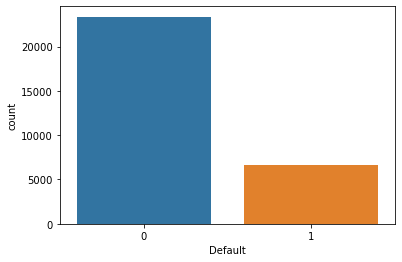

In [12]:
import seaborn as sns
sns.countplot(x=df["Default"])
plt.show()

### Here we observe that No of deafult payment are less compare to not default payment before training the model . perform down sampling method to handle imbalance data

In [13]:
df_no_default = df_no_missing[df_no_missing["Default"]==0]
df_default = df_no_missing[df_no_missing["Default"]==1]

* Down sample the data that did not default

In [14]:
df_no_default_downsampled=resample(df_no_default,replace=False,n_samples=1000,random_state=42)
print(df_no_default_downsampled["Default"].values)
print("Lenth of df_no_default_downsampled :-",len(df_no_default_downsampled))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

* Down sample the data which are default

In [15]:
df_default_downsampled=resample(df_default,replace=False,n_samples=1000,random_state=42)
print(df_default_downsampled["Default"].values)
print("Lenth of df_no_default_downsampled :-",len(df_default_downsampled))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

* Merge the down sampled datas

In [16]:
df_downsample=pd.concat([df_no_default_downsampled,df_default_downsampled])
print(df_downsample)
print("Length of df_downsample ",len(df_downsample))

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
641       130000    2          3         1   28      0      0      0      0   
4678      170000    1          3         1   29      0      0      0      0   
16004     180000    2          2         1   29      0      0      0      0   
22974     210000    2          2         2   32     -2     -2     -2     -2   
17535     190000    2          3         1   45      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
6154       30000    2          1         2   34      1      2      2      2   
14072     320000    1          1         1   43     -1      0      0      0   
5387       50000    1          2         2   23     -1     -1      0      0   
23192     150000    2          3         1   43      0      0      0      0   
8180      140000    1          2         1   28      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

* Lets check Data is balanced or not

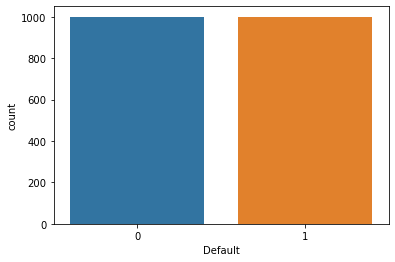

In [17]:
sns.countplot(x=df_downsample["Default"])
plt.show()

* Split the data into features and Target

In [18]:
X=df_downsample.drop('Default',axis=1).copy()
y=df_downsample["Default"].copy()

In [19]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [20]:
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: Default, dtype: int64

In [21]:
print("Shape of features :-",X.shape)
print("Shape of Target :-",y.shape)

Shape of features :- (2000, 23)
Shape of Target :- (2000,)


### Data formating - One Hot Encoding

*Why :-
* Lets see in marriage has categorical data we converted in numarical data, then would assume that ,[1,2,3] are continues which means other is more similar to 2 and 1 is 3 simlilar , so that SVM clusters people 2s and 3s together thats why we make it saparate binary columns specify it. It similar to all columns
* Two ways to do it
* 1. Pandas- get_dummies
* 2. sklearn- ColumnTransfer(

In [22]:
x_encoded=pd.get_dummies(X,columns=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"])
x_encoded

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,34,24022,24744,24053,25624,25977,25413,1396,0,...,0,0,0,0,1,0,0,0,0,0
14072,320000,43,18625,28143,32159,31851,3105,-45,10000,5000,...,0,0,0,1,0,0,0,0,0,0
5387,50000,23,2165,14796,20816,11804,1420,0,15000,20300,...,0,0,1,0,0,0,0,0,0,0
23192,150000,43,18308,19973,21000,22013,22449,22922,1973,1353,...,0,0,0,1,0,0,0,0,0,0


In [23]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [24]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [25]:
x_encoded.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_0_-2',
       'PAY_0_-1', 'PAY_0_0', 'PAY_0_1', 'PAY_0_2', 'PAY_0_3', 'PAY_0_4',
       'PAY_0_5', 'PAY_0_6', 'PAY_0_7', 'PAY_0_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_4_-2',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5',
       'PAY_4_7', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3',
       'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3'

### Centering and featur scaling

* Radian basis function using SVM Asuumes that all data are zero centered and scaled each column should have mean value=0 and standard deviation=0

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,random_state=42,)

In [28]:
x_train_scaled =scale(x_train)
x_test_scaled =scale(x_test)

### Build a preliminary Support Vector Machine

* Built a SVM model with basic parameters

In [29]:
clf_svm = SVC(random_state=42)
clf_svm.fit(x_train_scaled,y_train)

SVC(random_state=42)

* Lets's check the performance of above model with testing data

C:\Users\Sagar Guttal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


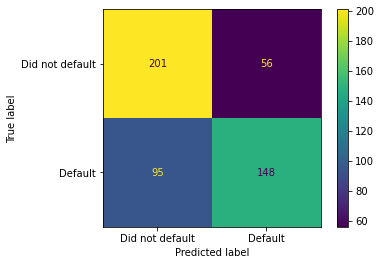

In [33]:
cm=plot_confusion_matrix(estimator=clf_svm,X=x_test_scaled,y_true=y_test,values_format ="d",display_labels=["Did not default","Default"])
cm

In [34]:
from sklearn import metrics

In [36]:
y_predict_1=clf_svm.predict(x_test_scaled)

In [39]:
Model_1_report=metrics.classification_report(y_test,y_predict_1)
print(Model_1_report)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       257
           1       0.73      0.61      0.66       243

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.69       500
weighted avg       0.70      0.70      0.70       500



#  Report :-
* 257 or around (78%) were correctly classified as not default
* 243 or around (61%) were correctly classified as defaulted

### Let's improve the model for more accuracy using Grid search for tuning the parameters
* c - The regularization parameter
* gamma - tune the with gamma
* select the Kerner for SVM

In [43]:
param_grid=[{
    "C":[0.5,1,10,100], #must be > 0
    "gamma":["scale",1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf"]
}]

optimal_params=GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy",verbose=0 )
optimal_params.fit(x_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


### Creatting a Final model by chaining the parameter 

In [44]:
final_svm = SVC(random_state=42,C=100,gamma=0.001,kernel="rbf")
final_svm.fit(x_train_scaled,y_train)

SVC(C=100, gamma=0.001, random_state=42)

C:\Users\Sagar Guttal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


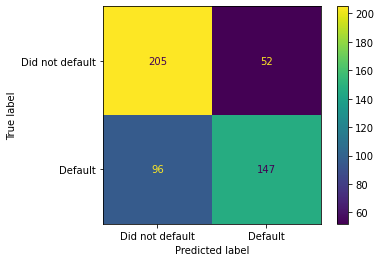

In [45]:
final_cm=plot_confusion_matrix(estimator=final_svm,X=x_test_scaled,y_true=y_test,values_format ="d",display_labels=["Did not default","Default"])
final_cm

In [47]:
Final_predictions=final_svm.predict(x_test_scaled)

In [48]:
final_Model_report=metrics.classification_report(y_test,Final_predictions)
print(final_Model_report)

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       257
           1       0.74      0.60      0.67       243

    accuracy                           0.70       500
   macro avg       0.71      0.70      0.70       500
weighted avg       0.71      0.70      0.70       500



* Lets see report model little bit improved 